<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 7: Linear Regression </h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 United States Military Academy, West Point 
AY20-2
<h2>======================================================</h2>

<h2>Lecture Outline</h2>

<ul>
    <li>What is Linear Regression?</li>
    <li>How does it work?</li>
    <li>Estimating the coeficients</li>
    <li> Assessing the accuracy of the coefficient estimates</li>
    <li>Assesing the accuracy of the model</li>
    <li>Dealing with qualitative predictors</li>
    <li>Problems to look out for</li>
    
</ul>

<h3> What is Linear Regression?</h3>

Linear regression is a simple supervised statistical learning technique used for predicting quantitative a response target. Though linear regression is one of the simplest and oldest statistical learning techniques it is still very useful and widely used to this day for many reasons. 

Linear regression is a good starting point for the newer and more sophisticated machine-learning techniques, many of which may be seen as generalizations of linear regresssion, thus, having a good understanding of linear regression proves invaluable in studying these newer and more sophisticated methods. 

 Throughoug this lecture we will use a portion of the `Boston Dataset` to illustrate many aspects of Linear Regresson.
 
 Before we continue with the rest of the lecture, let's go ahead and import some libraries: 

In [128]:
import numpy as np
import pandas as pd

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

Next let's go ahead and read in the `Boston_Dataset` in the folder for Lesson 7. This dataset is a subset of the famous `Boston` dataset that has been used often in illustrating different regression machine-learning techniques. 

<h3> Description of Boston house prices dataset</h3>


**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 8 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - CHAS     Charles River dummy variable (= Yes if tract bounds river; No otherwise)
        - RM       average number of rooms per dwelling
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population
        
     :Target
        -Price in $1000

In [130]:
boston=pd.read_excel('Boston_Dataset.xlsx',index_col=[0])

In [131]:
boston.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT,Price
Unnamed: 0,,,,,,,,,
0,0.00632,No,6.575,4.0900,1,296,15.3,4.98,24.0
1,0.02731,No,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.02729,No,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.03237,No,6.998,6.0622,3,222,18.7,2.94,33.4
4,0.06905,No,7.147,6.0622,3,222,18.7,5.33,36.2


<font color='red' size='4'>Mock Scenario</font>

Imagine the following scenario: Your team has been contracted by a real-estate company who owns many houses in the Boston metro-area. You are tasked to analyze if the house prices owned by the company are competitive and if they need to be adjusted to optimize the overall profit. 

Below are some questions that your team might want to address before making recommendations:

<ul>
    <li>Is there a relationship between the different <b>predictors/features</b> and the house <b>prices</b> </li>
    <li> If there is such a relationship, then how strong is it?</li>
    <li> Which features affect the most the house prices?</li>
    <li> How accurately can we estimate the effect of each feature to the house prices?</li>
    <li> How accurately can we predict the house prices based on these features?</li>
    <li>What kind of relationship is there between the features and the house prices? Linear?Non-linear?</li>
    <li> Is there any <b>interaction</b> effect among the features?</li>
    
 </ul>
 
We will attempt to address all of these questions using linear regression. 

You are already familiar with linear regression, so we will not spend much time on the theory behind simple linear regression.

<h3> Multiple Linear Regression</h3>

Let $X=(X_1,\dots,X_p)$ be $p$ predictors and let $Y$ be the response variable. Assuming there is some relationship between $X$ and $Y$ we have $$Y=f(X)+\epsilon$$ where, as per usual, $\epsilon$ represents a random error. 

If we suspect that the relationship between $X$ and $Y$ is linear, then we have

$$f(X)=\beta_0+\sum_{i=1}^p\beta_iX_i=\beta_0+\beta_1X_1+\dots+\beta_pX_p$$ where $\beta_0,\dots,\beta_p$ are some unknown coefficients that need to be estimated.

So, we have $$Y=\beta_0+\beta_1X_1+\dots+\beta_pX_p+\epsilon$$

<h4>Estimating Coefficients</h4>

The goal is to find estimates $\widehat{\beta}_0,\widehat{\beta}_1,\dots,\widehat{\beta}_p$, which then in turn allow us to make predictions using the formula $$\widehat{Y}=\widehat{\beta}_0+\widehat{\beta}_1X_1+\dots+\widehat{\beta}_pX_p.$$


How do we estimate the coefficients $\beta_0,\beta_1,\dots,\beta_p$?

There are actually many methods that may be used to estimate the coefficients in a linear model, each of which gives rise to a slightly different linear model.  

In this course we will learn about three of them:
<ul>
    <li>Least Squares (LS)</li>
    <li> Least Squares + $\ell^2$-regularization (Ridge Method)</li>
    <li> Least Squares + $\ell^1$-regularization (Lasso Method)</li>
</ul>

You are already familiar with the Least Squares method, which is the simplest form of linear regresssion and is what typically people refer to when talking about linear regression. 

In this lecture we will focus on the Least Squares, and talk about the other two in the next lectures. 

In the LS method we pick the coefficients $\widehat{\beta}_0,\widehat{\beta}_1,\dots,\widehat{\beta}_p$ such that the Residual Sum of Squares (RSS) is minimized; that is coefficients that minimize the quantity:

$$RSS=\sum_{i=1}^n\left(y_i-\widehat{y}_i\right)^2=\sum_{i=1}^n\left(y_i-\widehat{\beta}_0-\widehat{\beta}_1x_{i1}-\dots-\widehat{\beta}_px_{ip}\right)^2$$ where $n$ represents the number of samples. 

<b>Example</b>

In the case of the Boston housing data, the model would look like this:

$$\widehat{Price}=\hat{\beta_0}+\hat{\beta_1}\times (CRIM) +\hat{\beta_2}\times (CHAS) +\hat{\beta_3}\times (RM)+\hat{\beta_4}\times (DIS)+\hat{\beta_5}\times	(RAD)+\hat{\beta_6}\times (TAX)+\hat{\beta_7}\times(PTRATIO)+\hat{\beta_8}\times (LSTAT)$$

The simplest form of linear regression is when $p=1$. For example, if we were trying to predict the house pricing only based on the average number of rooms per house (RM), then the model would look like this:

$$\hat{y}=\beta_0+\beta_1\times(RM)$$

Below, is a scatterplot along with the line of best fit $\hat{y}$.

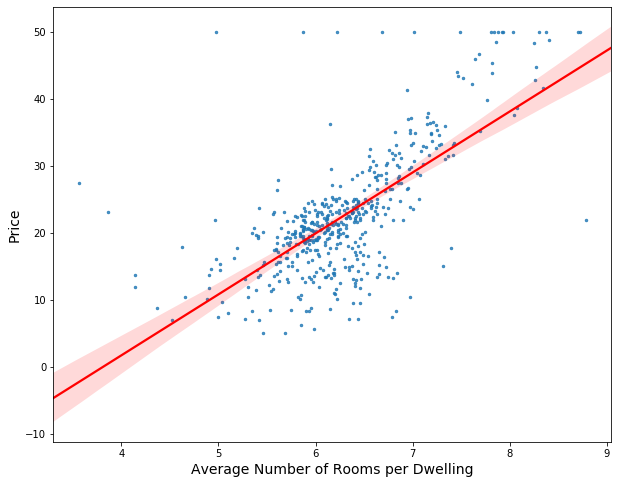

In [188]:
plt.figure(figsize=(10,8))
sns.regplot(x='RM',y='Price',data=boston,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.xlabel("Average Number of Rooms per Dwelling",fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()